# Jupiter Notebook for measuring the penetration behavior of water through paper
Step by step code presentation. For simple batch executing you can simply us 'poetry run script'. For capturing only use 'poetry run capture'

---
## Authors
Anne-Marie Kröher,Luisa Schueller, Peter Krutzke, Ralph Mückstein<br />
Coding support by Robert Unger

---
## Init
Import all classes and functions

In [2]:
# Makes plotting beauty
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
import seaborn as sns 

sns.set(style="darkgrid")

from paper_water_penetration.options import Options, BASE_DIR, TODAY
from paper_water_penetration.pwp import PaperWaterPenetration
from paper_water_penetration import calc, image

---
## Setup
Configure options

Camera Options - must be higher than resize size<br />
    width x height<br />
    160.0 x 120.0<br />
    176.0 x 144.0<br />
    320.0 x 240.0<br />
    352.0 x 288.0<br />
    640.0 x 480.0<br />
    1024.0 x 768.0<br />
    1280.0 x 1024.0<br />


In [ ]:
opts = Options(
    data_path = f"{BASE_DIR}/data/{TODAY}/",
    filename = "DVM22_Penetration",
    file_ending = ".png",
    wait_for_key = False, #wait for key
    write_capture = True, #write captured images to store?
    write_convertToGray = False, #write grey converted images to store?
    write_fft2_transform = True, #write fft2 transformed images to store?
    use_jet_colormap = True, #use jet colormap?
    write_radial_transform = True, #write radial transformed images to store?
    intervals = [(10000, 1000)], #every second one picture, duration 10 seconds
    resolution = (640, 480),
    resize = 300, # Square resize and cropping.
    )

pwp = PaperWaterPenetration(options=opts)

---
## Capturing images from camera
Define your intervals as a list of tuples(duration, interval).
You can also set Debug if needed.

If you wish to convert every image to gray scale, set convert param to True. Of course you can also perform the conversion process afterwards

In [ ]:
# start capturing

pwp.capture()

---
## Fast Fourier Transformation
Load image and transform. Example on one image. There is also a batch process.
For the example demo we use our dummy image lena.png<br />

IMPORTANT! We need to load image as 2D array. When reading image as gray scale, , this happens automatically.

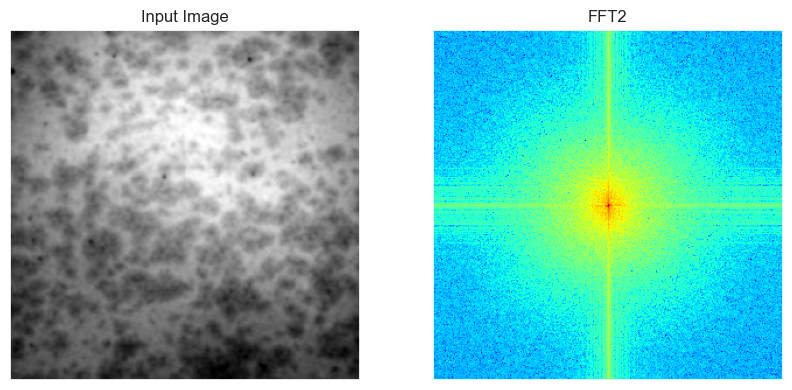

In [3]:
# Example

img_orginal = image.image_read_gray("../example/test_gray.png") # Need to load as gray scale (2D Array image)

# fft2 transformation
img_fft2 = calc.fft2_transformer(img_orginal)

plt.subplot(221), plt.imshow(img_orginal, cmap="gray")
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_fft2, cmap="jet")
plt.title('FFT2'), plt.xticks([]), plt.yticks([])
plt.show()

Using our batch process from pwp - there is nothing to show.<br />
You see the results in the data folder.
For our proper use case we can load the images directly from our image cache.

In [ ]:
pwp.convertToGray() # converts images to grey

pwp.fft2_transform() # batch fft2 transform

---
## Radial Profile
Calculating radial profile and plot. For this example step we used the processed img_fft2 variable.

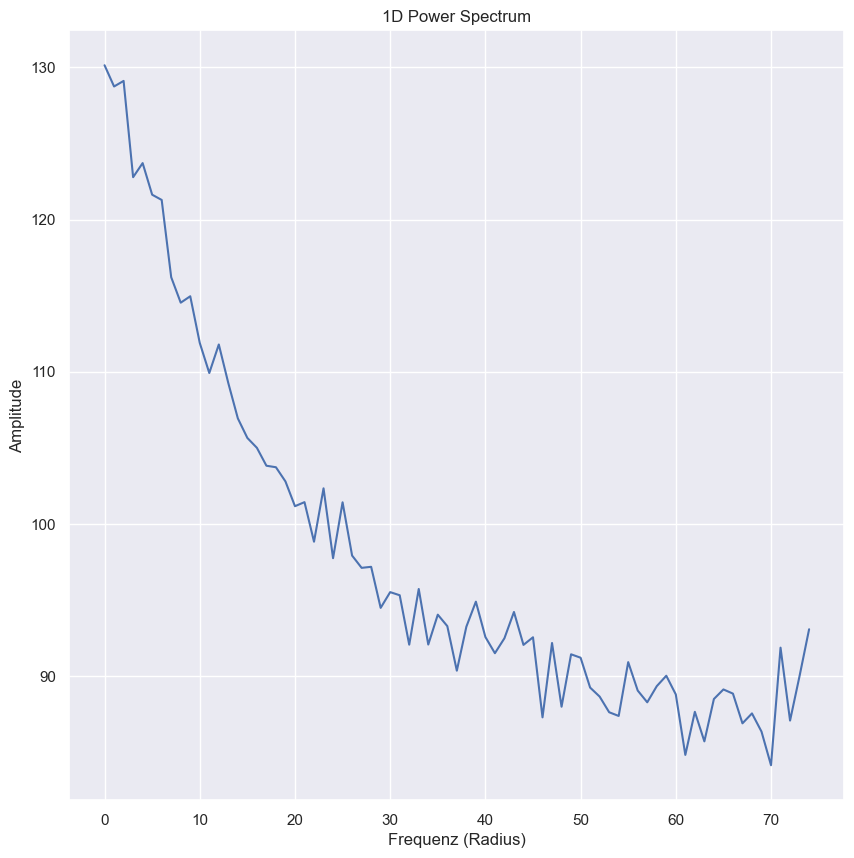

In [4]:
radial = calc.calc_radial_profile(img_fft2) # img_fft2 from previous step
plt.plot(radial)
plt.title('1D Power Spectrum')
plt.xlabel('Frequenz (Radius)')
plt.ylabel('Amplitude')
plt.show()

We can also use the batch process from pwp. You find the results in the data folder

In [ ]:
pwp.radial_transform()

-----------

Thats all....